# **Task:**
Predict each player’s three-point percentage at the end of the 2022-23 season given their shooting
statistics from October/November 2022. You have the last 12 columns to create your prediction and the
second column, three_pct_season to test your prediction accuracy (data dictionary below).

# **Reference Information & Description**

In [146]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Data Digestion**

In [147]:
#Reading fas_2024 dataset

fp = r"/content/drive/MyDrive/fas_2024.csv"

df = pd.read_csv(fp)

df.head()

,Name,three_pct_season,lwr_paint_pct_oct_nov,upr_paint_pct_oct_nov,mid_pct_oct_nov,three_non_cnr_pct_oct_nov,three_cnr_pct_oct_nov,ft_pct_oct_nov,lwr_paint_shots_oct_nov,upr_paint_shots_oct_nov,mid_shots_oct_nov,three_non_cnr_shots_oct_nov,three_cnr_shots_oct_nov,ft_shots_oct_nov
0,Malcolm Brogdon,0.437,0.484,0.619,0.600,0.444,0.485,0.863,62,21,10,27,33,51
1,Tyrese Maxey,0.435,0.505,0.452,0.458,0.512,0.361,0.738,105,42,24,41,61,65
2,Stephen Curry,0.432,0.706,0.526,0.467,0.415,0.466,0.907,109,38,30,82,148,107
3,Kentavious Caldwell-Pope,0.422,0.484,0.250,0.448,0.512,0.476,0.767,31,16,29,43,42,30
4,Jevon Carter,0.421,0.483,0.375,0.500,0.321,0.480,0.846,29,16,32,28,50,13


In [148]:
df.tail()

,Name,three_pct_season,lwr_paint_pct_oct_nov,upr_paint_pct_oct_nov,mid_pct_oct_nov,three_non_cnr_pct_oct_nov,three_cnr_pct_oct_nov,ft_pct_oct_nov,lwr_paint_shots_oct_nov,upr_paint_shots_oct_nov,mid_shots_oct_nov,three_non_cnr_shots_oct_nov,three_cnr_shots_oct_nov,ft_shots_oct_nov
103,Scottie Barnes,0.283,0.577,0.167,0.346,0.364,0.343,0.724,111,30,26,33,35,29
104,Killian Hayes,0.280,0.278,0.446,0.368,0.200,0.406,0.842,54,56,19,30,32,19
105,Giannis Antetokounmpo,0.275,0.664,0.268,0.419,0.241,0.222,0.608,238,41,31,29,27,212
106,Bol Bol,0.268,0.800,0.452,0.231,0.500,0.333,0.767,100,31,13,22,21,43
107,Dennis Smith Jr.,0.220,0.562,0.381,0.300,0.364,0.316,0.500,73,21,10,11,19,12


In [149]:
#Now we will go through the proccess of getting info about the dataset
df.info()

#Taking note:
#14 total columns
#108 rows
#1 string type
#7 float types
#6 Integer types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Name                         108 non-null    object 
 1   three_pct_season             108 non-null    float64
 2   lwr_paint_pct_oct_nov        108 non-null    float64
 3   upr_paint_pct_oct_nov        108 non-null    float64
 4   mid_pct_oct_nov              108 non-null    float64
 5   three_non_cnr_pct_oct_nov    108 non-null    float64
 6   three_cnr_pct_oct_nov        108 non-null    float64
 7   ft_pct_oct_nov               108 non-null    float64
 8   lwr_paint_shots_oct_nov      108 non-null    int64  
 9   upr_paint_shots_oct_nov      108 non-null    int64  
 10  mid_shots_oct_nov            108 non-null    int64  
 11  three_non_cnr_shots_oct_nov  108 non-null    int64  
 12  three_cnr_shots_oct_nov      108 non-null    int64  
 13  ft_shots_oct_nov    

In [150]:
#There didnt seem to be Null values in the data but to be safe we'll check here

df.isnull().sum()

#No null values present in data
#Good clean dataset

Name                           0
three_pct_season               0
lwr_paint_pct_oct_nov          0
upr_paint_pct_oct_nov          0
mid_pct_oct_nov                0
three_non_cnr_pct_oct_nov      0
three_cnr_pct_oct_nov          0
ft_pct_oct_nov                 0
lwr_paint_shots_oct_nov        0
upr_paint_shots_oct_nov        0
mid_shots_oct_nov              0
three_non_cnr_shots_oct_nov    0
three_cnr_shots_oct_nov        0
ft_shots_oct_nov               0
dtype: int64

In [151]:
#Now lets look at our stats on the dataset

df.describe()

,three_pct_season,lwr_paint_pct_oct_nov,upr_paint_pct_oct_nov,mid_pct_oct_nov,three_non_cnr_pct_oct_nov,three_cnr_pct_oct_nov,ft_pct_oct_nov,lwr_paint_shots_oct_nov,upr_paint_shots_oct_nov,mid_shots_oct_nov,three_non_cnr_shots_oct_nov,three_cnr_shots_oct_nov,ft_shots_oct_nov
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,0.361176,0.575398,0.435944,0.407519,0.366417,0.355046,0.801222,88.138889,40.425926,24.092593,39.435185,57.472222,69.425926
std,0.039623,0.083720,0.091394,0.121003,0.088564,0.068755,0.083965,42.961939,25.618409,13.055265,15.021028,28.042177,46.346965
min,0.220000,0.278000,0.167000,0.000000,0.150000,0.167000,0.500000,14.000000,10.000000,10.000000,11.000000,12.000000,7.000000
25%,0.337000,0.514000,0.388250,0.330000,0.307000,0.316000,0.741000,54.000000,23.000000,14.000000,28.000000,35.000000,34.000000
50%,0.366500,0.578500,0.444000,0.402500,0.364000,0.359000,0.811000,85.000000,34.000000,22.000000,40.500000,55.500000,58.000000
75%,0.387250,0.625750,0.488750,0.477250,0.426750,0.394250,0.868500,111.250000,50.000000,31.000000,49.000000,74.250000,96.000000
max,0.437000,0.800000,0.692000,0.900000,0.667000,0.500000,1.000000,238.000000,170.000000,72.000000,82.000000,159.000000,213.000000


# **Visualizing the Dataset**

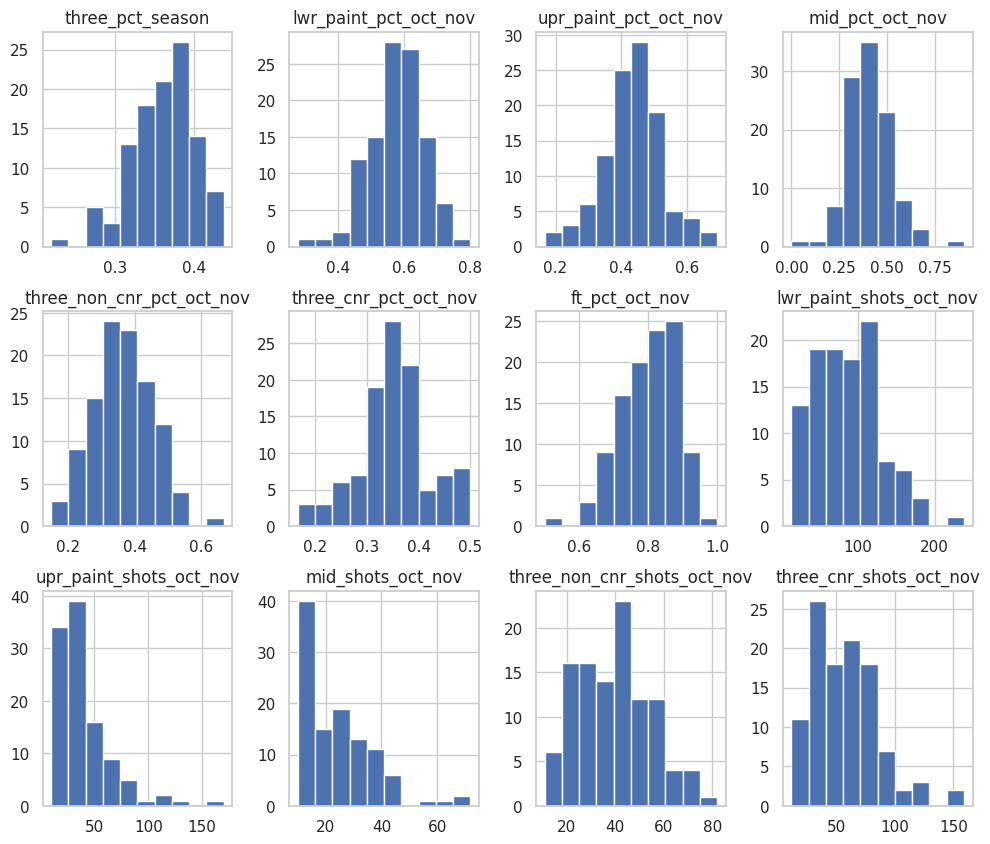

In [152]:
#Here we want to check the distribution of our numerical columns
#This gives us more insights about how the data is skewed per column

columns = list(df)[:13]

df[columns].hist(figsize=(12,50),layout=(14,4))

plt.show()

# **More Visuals Exploring the Dataset**

In [153]:
#We want to look into the correlation of the Dataset and how closely some attributes relate to one another

df.corr()

<ipython-input-153-fa9bd433323d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,three_pct_season,lwr_paint_pct_oct_nov,upr_paint_pct_oct_nov,mid_pct_oct_nov,three_non_cnr_pct_oct_nov,three_cnr_pct_oct_nov,ft_pct_oct_nov,lwr_paint_shots_oct_nov,upr_paint_shots_oct_nov,mid_shots_oct_nov,three_non_cnr_shots_oct_nov,three_cnr_shots_oct_nov,ft_shots_oct_nov
three_pct_season,1.000000,-0.062074,0.290882,0.164970,0.271946,0.508241,0.347510,-0.249411,0.052534,0.068135,0.230933,0.227750,-0.083265
lwr_paint_pct_oct_nov,-0.062074,1.000000,0.157768,-0.028362,-0.053783,-0.118113,-0.015968,0.259837,0.084469,0.063481,0.045722,-0.032481,0.228880
upr_paint_pct_oct_nov,0.290882,0.157768,1.000000,0.003467,0.011886,0.141983,0.242476,-0.053602,0.341254,0.118427,0.047651,0.052944,0.195557
mid_pct_oct_nov,0.164970,-0.028362,0.003467,1.000000,-0.200010,0.112073,0.152411,0.076189,0.160250,0.121652,0.007788,0.069762,0.091591
three_non_cnr_pct_oct_nov,0.271946,-0.053783,0.011886,-0.200010,1.000000,-0.077347,0.038007,-0.191851,-0.154268,-0.085803,0.031055,-0.068381,-0.181383
three_cnr_pct_oct_nov,0.508241,-0.118113,0.141983,0.112073,-0.077347,1.000000,0.046729,-0.212978,0.092884,0.113577,0.119638,0.178606,-0.117833
ft_pct_oct_nov,0.347510,-0.015968,0.242476,0.152411,0.038007,0.046729,1.000000,-0.026515,0.248464,0.220569,0.245847,0.215680,0.151893
lwr_paint_shots_oct_nov,-0.249411,0.259837,-0.053602,0.076189,-0.191851,-0.212978,-0.026515,1.000000,0.310392,0.155040,0.285276,0.176435,0.736386
upr_paint_shots_oct_nov,0.052534,0.084469,0.341254,0.160250,-0.154268,0.092884,0.248464,0.310392,1.000000,0.600775,0.135591,0.130356,0.542252
mid_shots_oct_nov,0.068135,0.063481,0.118427,0.121652,-0.085803,0.113577,0.220569,0.155040,0.600775,1.000000,0.227452,0.324495,0.398527


<ipython-input-154-5c98761f0617>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr().abs(), vmax=1,square=True,annot=True,cmap='viridis')


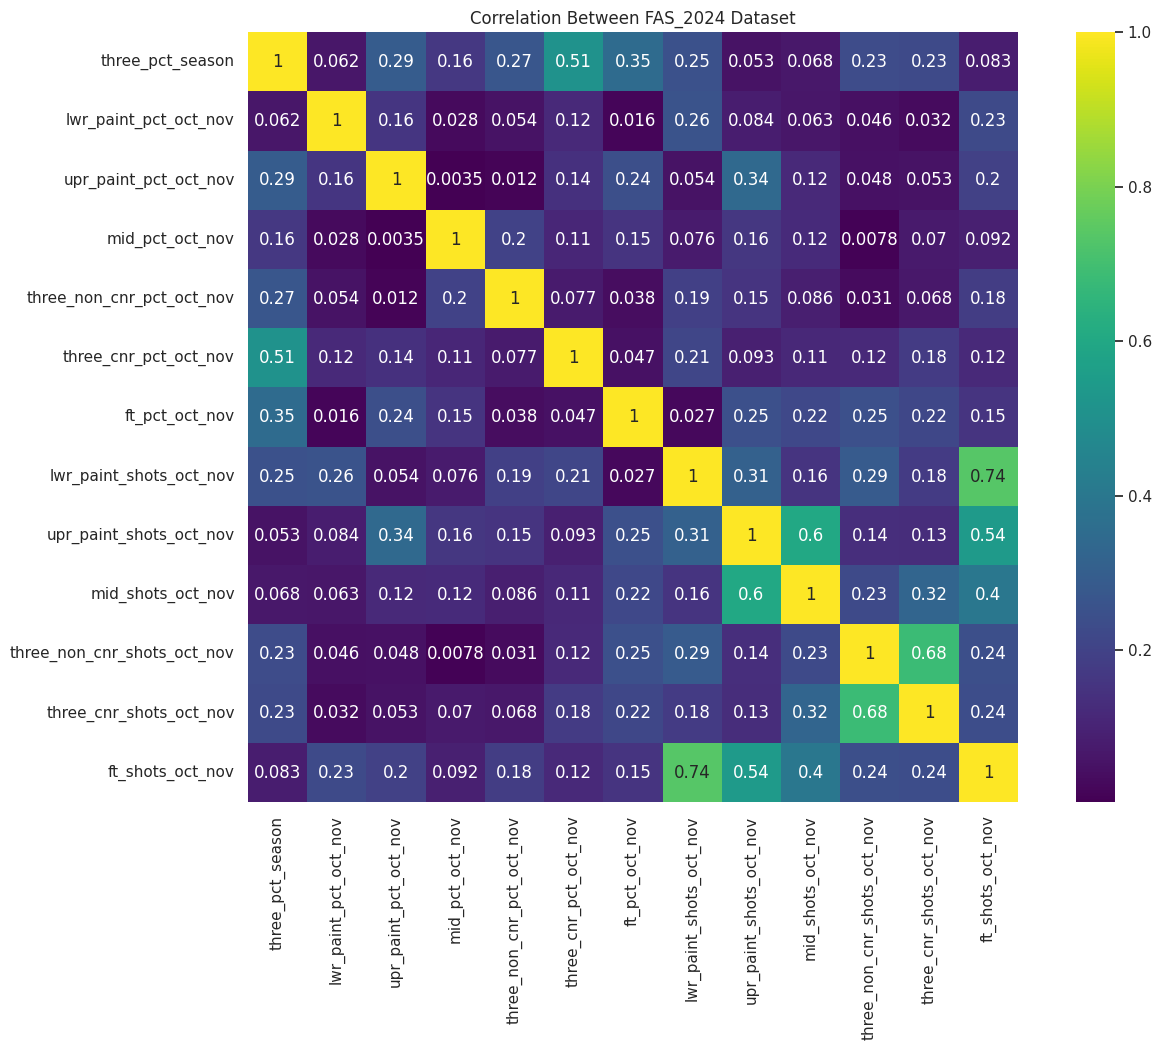

In [154]:
#Now that I have my correlation I will put it into a heat map to better visualize it

plt.subplots(figsize=(15,10))

sns.heatmap(df.corr().abs(), vmax=1,square=True,annot=True,cmap='viridis')

plt.title("Correlation Between FAS_2024 Dataset")


plt.show()


# **Analysis Based off Correlation:**
Based off of the heatmap, this helped me indentify some features that I would like to use in in concurrent of our prediction for three_pct_season.
I will first go through and run the whole dataset, and adjust my feature selections after accuracy and models predictions.

# **Data Preproccessing**

In [155]:
#Check Data Types

df.dtypes

Name                            object
three_pct_season               float64
lwr_paint_pct_oct_nov          float64
upr_paint_pct_oct_nov          float64
mid_pct_oct_nov                float64
three_non_cnr_pct_oct_nov      float64
three_cnr_pct_oct_nov          float64
ft_pct_oct_nov                 float64
lwr_paint_shots_oct_nov          int64
upr_paint_shots_oct_nov          int64
mid_shots_oct_nov                int64
three_non_cnr_shots_oct_nov      int64
three_cnr_shots_oct_nov          int64
ft_shots_oct_nov                 int64
dtype: object

In [156]:
#We know there is no null values but it is always good to look again before moving forward in the Preproccessing section.

df.isna().sum()

Name                           0
three_pct_season               0
lwr_paint_pct_oct_nov          0
upr_paint_pct_oct_nov          0
mid_pct_oct_nov                0
three_non_cnr_pct_oct_nov      0
three_cnr_pct_oct_nov          0
ft_pct_oct_nov                 0
lwr_paint_shots_oct_nov        0
upr_paint_shots_oct_nov        0
mid_shots_oct_nov              0
three_non_cnr_shots_oct_nov    0
three_cnr_shots_oct_nov        0
ft_shots_oct_nov               0
dtype: int64

#**Splitting X and y**

In [157]:
#Splitting X
#X will be our features

X = df[['upr_paint_pct_oct_nov','three_cnr_pct_oct_nov' ,'three_non_cnr_pct_oct_nov','ft_pct_oct_nov']]
X

,upr_paint_pct_oct_nov,three_cnr_pct_oct_nov,three_non_cnr_pct_oct_nov,ft_pct_oct_nov
0,0.619,0.485,0.444,0.863
1,0.452,0.361,0.512,0.738
2,0.526,0.466,0.415,0.907
3,0.250,0.476,0.512,0.767
4,0.375,0.480,0.321,0.846
...,...,...,...,...
103,0.167,0.343,0.364,0.724
104,0.446,0.406,0.200,0.842
105,0.268,0.222,0.241,0.608
106,0.452,0.333,0.500,0.767


In [158]:
#Splitting y
#y is our prediction varible we want

y = df['three_pct_season']

y

0      0.437
1      0.435
2      0.432
3      0.422
4      0.421
       ...  
103    0.283
104    0.280
105    0.275
106    0.268
107    0.220
Name: three_pct_season, Length: 108, dtype: float64

# **Train/Test/Split Data**

In [159]:
#import train_test_split from scikit learn
from sklearn.model_selection import train_test_split
#Now we need to split and train our data
#Train test split is used to evaluate the performance of a Machine Leaning model
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.20,random_state=42)

# **Modeling**

In [160]:
#import Linear Regression model from scikit learn
from sklearn.linear_model import LinearRegression

In [161]:
#Modeling
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [162]:
#Predictions
y_pred = lr.predict(X_test)

In [163]:
# Adding 'Name' column to the testing dataset for post-processing
X_test_with_names = df.loc[X_test.index, ['Name']].copy()


In [164]:
 #Creating a DataFrame with player names and predicted three-point percentages
predictions_df = pd.DataFrame({'Name': X_test_with_names['Name'], 'Predicted_Three_Point_Percentage': y_pred})


In [165]:
#Adding the three_pct_season as the actual_three_pct for the season
predictions_df['Actual_Three_Pct'] = df.loc[X_test.index, 'three_pct_season'].values

In [166]:
# Displaying the DataFrame
predictions_df

,Name,Predicted_Three_Point_Percentage,Actual_Three_Pct
77,Julius Randle,0.355585,0.342
10,Patrick Williams,0.400740,0.410
4,Jevon Carter,0.401294,0.421
83,Jalen Suggs,0.318798,0.332
62,Malik Beasley,0.396625,0.359
...,...,...,...
75,Kyle Lowry,0.380254,0.343
32,Nikola Jokic,0.361806,0.386
101,Jalen Smith,0.315540,0.289
59,Karl-Anthony Towns,0.363539,0.362


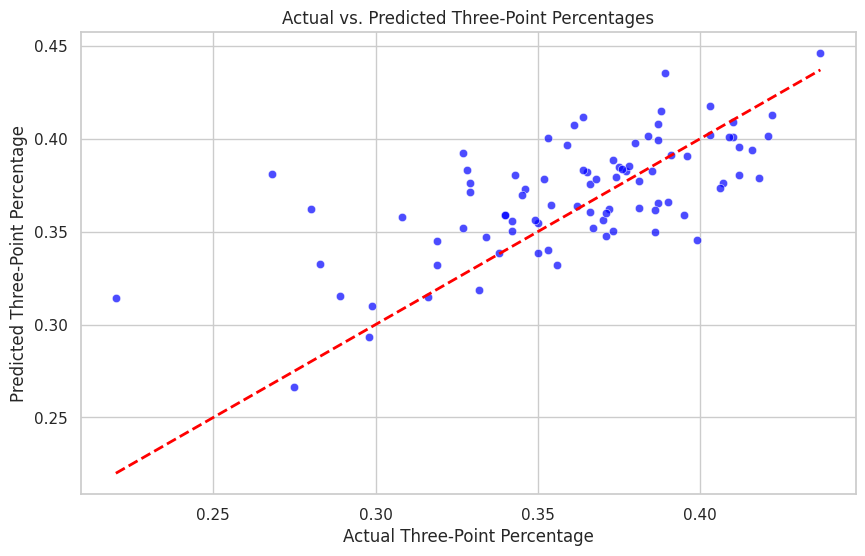

In [167]:
#Creating and plotting a scatter plot with a best fit lineto visualize Actual vs Predicted 3 point percentages
sns.set(style="whitegrid")

#scatter plot comparing actual vs. predicted three-point percentages
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual_Three_Pct', y='Predicted_Three_Point_Percentage', data=predictions_df, color='blue', alpha=0.7)

#Adding Line of best fit
plt.plot([min(predictions_df['Actual_Three_Pct']), max(predictions_df['Actual_Three_Pct'])],
         [min(predictions_df['Actual_Three_Pct']), max(predictions_df['Actual_Three_Pct'])],
         color='red', linestyle='--', linewidth=2)

plt.xlabel('Actual Three-Point Percentage')
plt.ylabel('Predicted Three-Point Percentage')
plt.title('Actual vs. Predicted Three-Point Percentages')

plt.show()

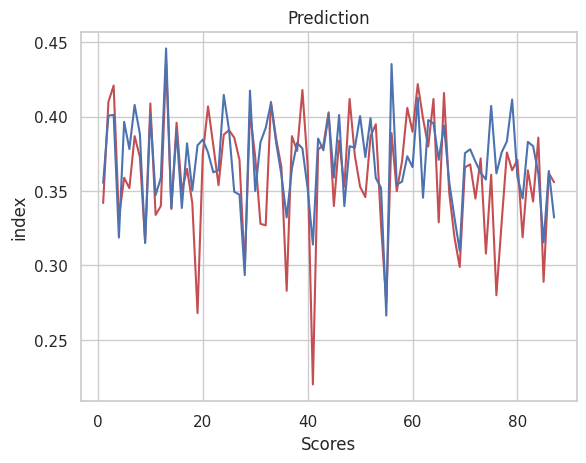

In [168]:
#plot actual vs predicted
#Here we are comparing the test data set(Which is the correct data and labels) and the prediction dataset

c = [i for i in range (1,len(y_test)+1,1)]

plt.plot(c,y_test,color='r',linestyle='-')
plt.plot(c,y_pred,color='b',linestyle='-')
plt.xlabel('Scores')
plt.ylabel('index')
plt.title('Prediction')
plt.ticklabel_format(axis="y", style="plain")
plt.show()

#Our prediction data is in blue
#Our historical or training set is in red

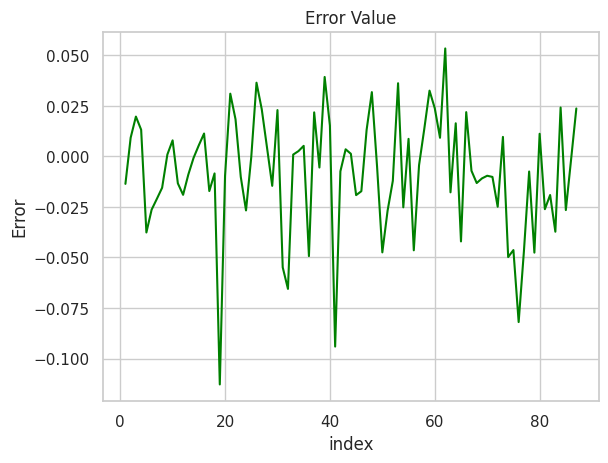

In [169]:
#plotting the error
#Here we are plotting the errorr values that were in the predicted set
c = [i for i in range(1,len(y_test)+1,1)]
plt.plot(c,y_test-y_pred,color='green',linestyle='-')
plt.xlabel('index')
plt.ylabel('Error')
plt.title('Error Value')
plt.ticklabel_format(axis="y", style="plain")
plt.show()

In [170]:
#Intercept and coeff of the line
print('Intercept of the model:',lr.intercept_)
print('Coefficient of the line:', lr.coef_)

Intercept of the model: 0.05774429176210821
Coefficient of the line: [0.08201594 0.32506676 0.17050351 0.12060318]


In [171]:
#Accuracy metrics from scikit learn
from sklearn import metrics
#MAE definition:is a measure of the average size of the mistakes in a collection of predictions, without taking their direction into account
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
#MSE: measures how close a regression line is to a set of data points.
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
#is one of the most commonly used measures for evaluating the quality of predictions. It shows how far predictions fall from measured true values
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r square :' , metrics.r2_score(y_test, y_pred))

#r-squared shows how well the data fit the regression model
#a good r-squared values is between 0.50 to 0.99
#This output is 0.39, that is okay and there is always room for improvement but this is good if you take into account our MAE,MSE, and RMSE!

Mean Absolute Error: 0.02283654384978407
Mean Squared Error: 0.0009390398710899962
Root Mean Squared Error: 0.030643757457106922
r square : 0.392545938629251
